In [97]:
#Importerer nødvendige libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import pickle

#Loader datasæt og viser datasæt
df = pd.read_csv('./static/data/data.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [98]:
#Viser relavante informationer om vores datasæt
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,313016.000000,313016.000000,313016.000000,313016.000000
mean,28.279317,3.346602,3.885491,7.098541
std,6.334148,7.920464,7.934578,1.434012
min,12.020000,0.000000,0.000000,1.000000
25%,23.990000,0.000000,0.000000,6.000000
50%,27.280000,0.000000,0.000000,7.000000
75%,31.320000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


<AxesSubplot:>

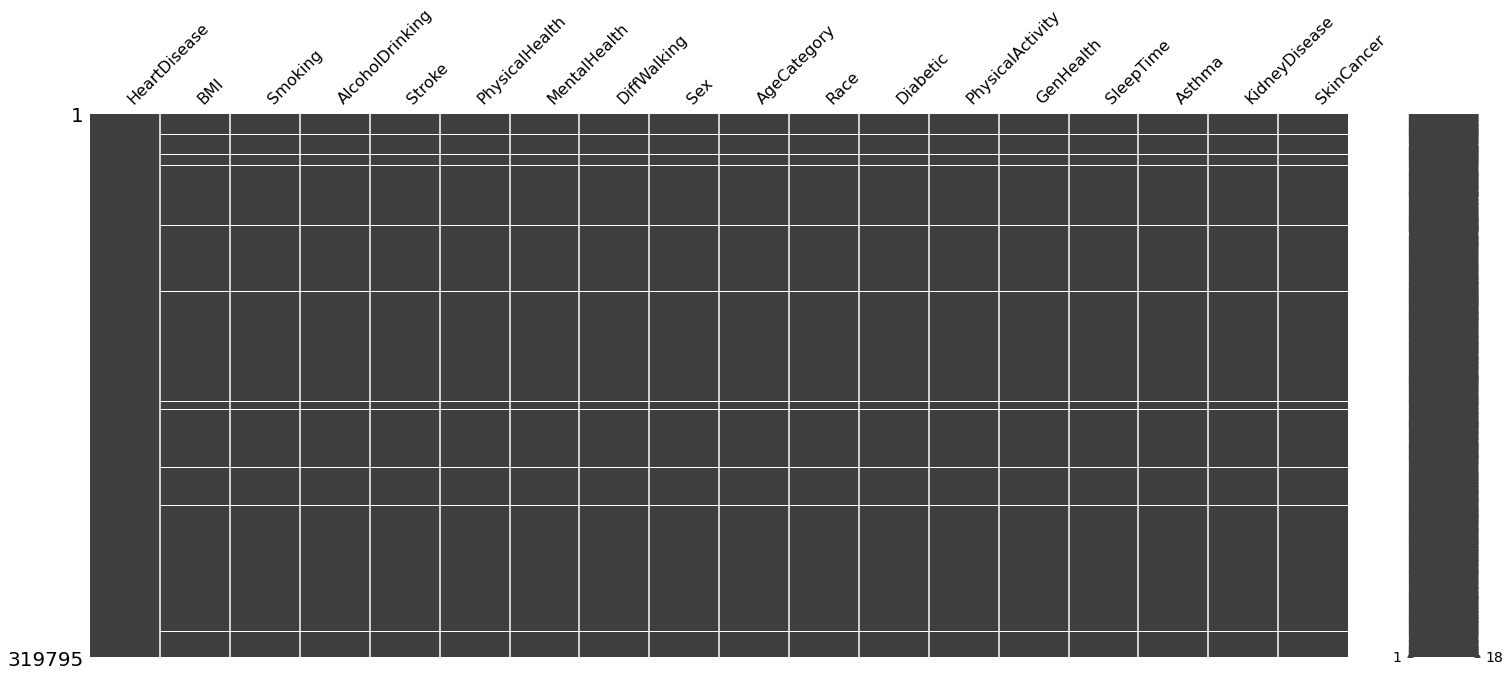

In [99]:
#Visualiserer om vi mangler nogle data
import missingno as msno
msno.matrix(df)

Det ses at vi mangler data, derfor skal der rydes op i datasættet.

<AxesSubplot:>

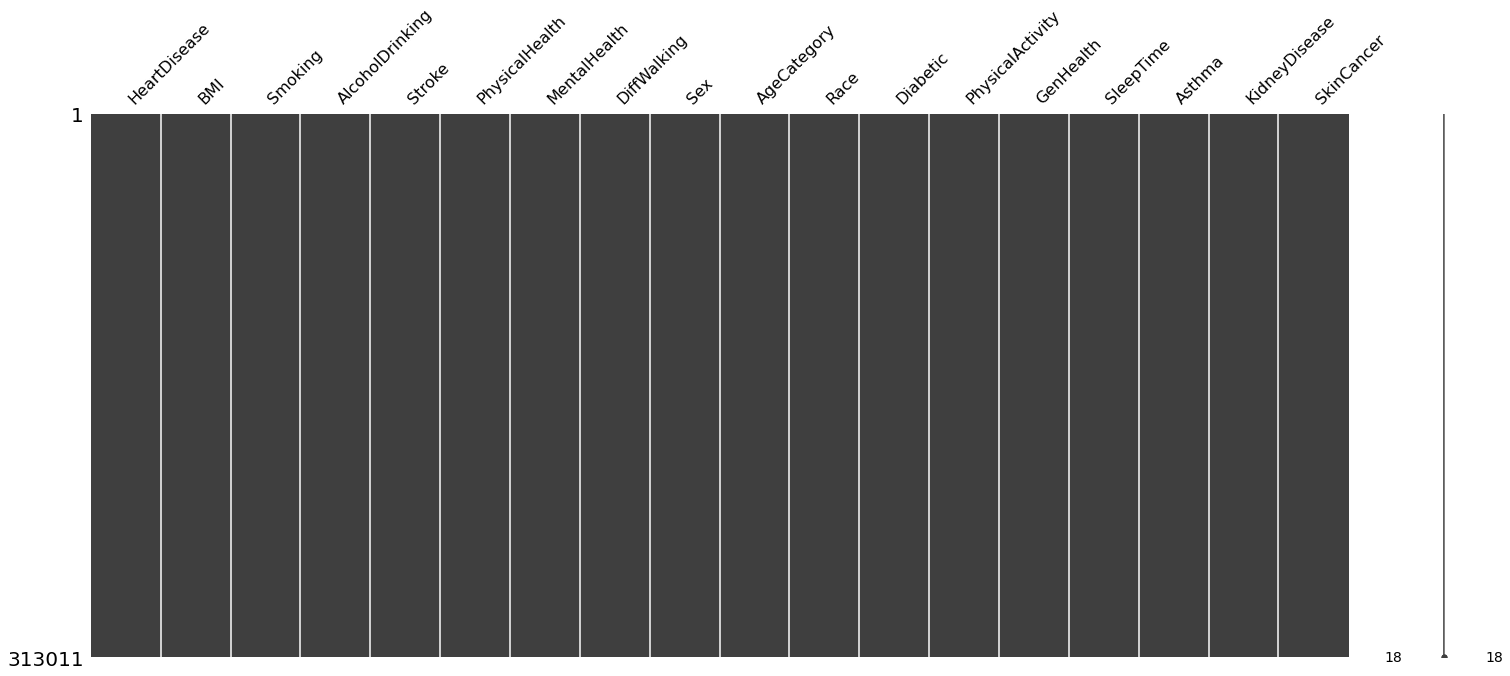

In [100]:
#Fjerner alle invalide data
df = df.dropna()

#Tjekker om de er fjernet
msno.matrix(df)

Det ses at den invalide data er fjernet.

In [101]:
#Tjekker for unikke valgmuligheder
df.nunique()

HeartDisease           2
BMI                 3575
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               3
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [102]:
#Tjekker for unikke diabetis muligheder
df['Diabetic'].unique()

array(['Yes', 'No', 'Yes (during pregnancy)'], dtype=object)

Det bemærkes, at nogle attributter har flere valgmuligheder end 2, og derfor udføres der en replacement, da vores model ikke skal tage højde for eksempelvis diabetes under pregnancy.

In [103]:
#Replacer alle "No" med 0 og alle "Yes" med 1
df['Diabetic'] =  df['Diabetic'].replace(["No, borderline diabetes", "No"], value=0)
df['Diabetic'] =  df['Diabetic'].replace(["Yes", "Yes (during pregnancy)"], value=1)

#Tjekker om der kun er 2 muligheder:
df['Diabetic'].unique()


array([1, 0], dtype=int64)

In [104]:
#Danner dataframet, med dataerne "age,", "occupation" og income, som der ses under
Df=pd.DataFrame({'Risiko' : df["HeartDisease"], 'BMI' : df["BMI"], 'Ryger' : df['Smoking'], 'Alkohol' : df['AlcoholDrinking'], 'Stroke' : df['Stroke'], 'Køn' : df['Sex'], 'Aldersgruppe' : df['AgeCategory'], 'Diabetiker' : df['Diabetic']})
Df.head()

,Risiko,BMI,Ryger,Alkohol,Stroke,Køn,Aldersgruppe,Diabetiker
0,No,16.60,Yes,No,No,Female,55-59,1
1,No,20.34,No,No,Yes,Female,80 or older,0
2,No,26.58,Yes,No,No,Male,65-69,1
3,No,24.21,No,No,No,Female,75-79,0
4,No,23.71,No,No,No,Female,40-44,0


In [105]:
Df['Ryger'].unique()

array(['Yes', 'No'], dtype=object)

In [106]:
#LabelEncoder alle strings
Df['Risiko'] = LabelEncoder().fit_transform(Df['Risiko'])
Df['Ryger'] = LabelEncoder().fit_transform(Df['Ryger'])
Df['Alkohol'] = LabelEncoder().fit_transform(Df['Alkohol'])
Df['Stroke'] = LabelEncoder().fit_transform(Df['Stroke'])
Df['Køn'] = LabelEncoder().fit_transform(Df['Køn'])
Df['Aldersgruppe'] = LabelEncoder().fit_transform(Df['Aldersgruppe'])

#Viser tabellen
Df.head()

,Risiko,BMI,Ryger,Alkohol,Stroke,Køn,Aldersgruppe,Diabetiker
0,0,16.60,1,0,0,0,7,1
1,0,20.34,0,0,1,0,12,0
2,0,26.58,1,0,0,1,9,1
3,0,24.21,0,0,0,0,11,0
4,0,23.71,0,0,0,0,4,0


In [107]:
Df['Ryger'].unique()

array([1, 0])

In [108]:
#Vælger features
Selected_features = ['Ryger', 'Alkohol','Stroke', 'Køn', 'Aldersgruppe']

X = Df[Selected_features]

#Vælger vores target
y = Df['Risiko']

#Danner variabel til at træne modellen
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8, random_state=0)

In [109]:
#Laver regression 
model = LogisticRegression()

#Træner model ud fra data
model.fit(X_train, y_train)

#Giver en prediction ud fra test dataerne 
predictions = model.predict(X_test)

#Tester accuracy og finder ud af hvor præcis vores model er.
print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95     57228
           1       0.47      0.04      0.08      5375

    accuracy                           0.91     62603
   macro avg       0.69      0.52      0.52     62603
weighted avg       0.88      0.91      0.88     62603

Predicted labels:  [0 0 0 ... 0 0 0]
Accuracy:  0.9136942319058192


In [110]:
#Opretter pickle fil på den angivne sti, under navnet "Salary.pkl"
model_filename = './static/data/Risiko.pkl'

#Dumper en binær pickle fil til computeren
pickle.dump(model, open(model_filename,'wb'))

#Loader pickle filen og læser den binært
model = pickle.load(open('./static/data/Risiko.pkl','rb'))